HI all  😍

In this notebook we will write a simple code to recognize text from a picture using python and OCR.space API. 

if you don't know what is an API here is a useful link to get an overview: https://www.altexsoft.com/blog/engineering/what-is-api-definition-types-specifications-documentation/

An API is a set of programming code that enables data transmission between one software product and another. It also contains the terms of this data exchange

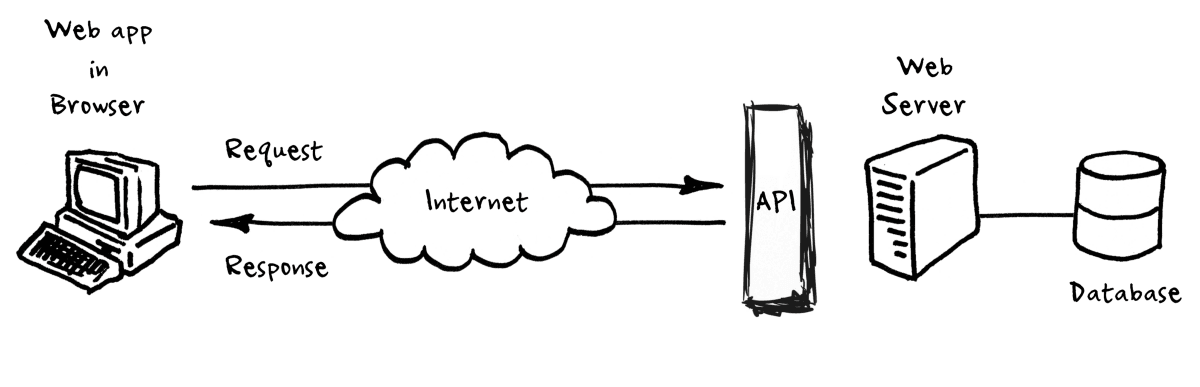

**Optical Character Recognition (OCR)
****

is a process run by an OCR software. The software will open a digital image, e.g. a tiff file containing full text characters, and then attempt to read and translate the characters into recognizable full text and save them as a full text file. This is a quick process that enables automated conversion of millions of images into full-text files that can then be searched by word or character. This is a very useful and cost efficient process for large scale digitisation projects for text based materials including books, journals and newspapers. There are several OCR software packages on the market but a popular package for older material or that in languages other than English is Abbyy Finereader. This is currently being used by several newspaper digitisation projects internationally.

The OCR process is dependant upon a number of factors and these factors influence results quite radically. Experience to date has shown that using OCR software over good quality clean images (e.g. a new PDF file) has excellent results and most characters will be recognized correctly therefore leading to successful word searching and retrieval. However over older materials e.g. books and newspapers the OCR is extremely variable and for this reason some projects advocate re-keying the text from scratch, rather than attempting OCR. The process is labour intensive and sometimes a combination of both re-keying and OCR will be performed for a project. It is usual to undertake sample tests on the actual source material to be digitised before making decisions about OCR and re-keying.

# NB: 
OCR Can help you save your time and your effort in extracting texts from images ; you save the time spent in typing the whole text by yourself. 

there are some issues you should take care of : 
- the quality of your image, the written content 
- the font size , you can seperate the font from the background !! the font is skewed or distorted !! 

- the size of the image 
- the quality of the light 

***ocr.space is an OCR engine that offers free API*


It means that is going to do pretty much all the work regarding text detection. We only need to send through their API an image with the text we want to scan,
and it will return us the text scanned.

First of all, you need to get an API key.

Go on http://ocr.space/OCRAPI and then click on “Register for free API Key”.

*NB : The free OCR API plan has a rate limit of 500 requests within one day per IP address to prevent accidental spamming*****.

In [1]:
import io #The io module provides Python’s main facilities for dealing with various types of I/O.
import json #JSON (JavaScript Object Notation) is a lightweight data-interchange format
import cv2 # cv2.imread(), cv2.imshow() , cv2.imwrite()
import numpy as np #create a NumPy array, use broadcasting, access values, manipulate arrays, and much more
import requests #Make a request to a web page, and print the response text
import matplotlib.pyplot as plt  #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- load the image using opencv (cv2) 
- the image needs to be converted to a binary image ; grayscaling it if it is an RGB image. **GRAYSCALING** takes the threee RGB values of an image and transfors it with the following formula to a single value which represents a shade of gray. [0-255] : 255 being the brighest shade of grey (white) and 0 being the darkest shade of grey (black). 
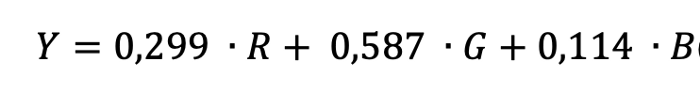

after the **grayscaling **, it comes the **thresholding ** ; the thresholding is used to decide whether the value of a pixel is below or above a certain threshold. 
1. pixels < the threshold ===> turned to white pixel 
2. pixels > the threshold ===> turned to black pixel 

the result of 1 and 2 is that we get a binary image ( white background and black foreground) 

To read more about thresholdig you can check this : [https://towardsdatascience.com/understanding-the-basics-of-digital-image-processing-and-computer-vision-using-opencv-8bc0e67243c8](http://)





In [2]:
#import the necessary libraries and load the image using matplotlib. 
img = cv2.imread("../input/tbs-image/TBS_image.png")
height, width, _ = img.shape
height
width,height

(608, 391)

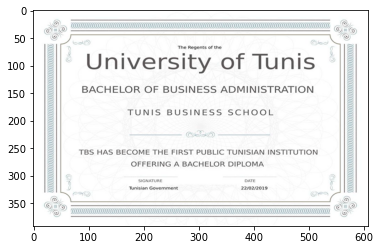

In [3]:
plt.imshow(img)

after loading the image of the TBS bachelor , we need to set the OCR engine : send the image to the ocr.space server in order to be processed. 
here there are few notes : 
1. sending the image to the ocr.space server 
2. since we are using the free service, we can not send an image with maximum 1mb of size , so we need to shrink the size of our image by compressing it. 
3. also, to send the image to the server we need to convert the image into bytes. 

In [4]:
url_api = "https://api.ocr.space/parse/image"

In [5]:
# Ocr
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".jpg", img, [1, 90])
file_bytes = io.BytesIO(compressedimage)

In [6]:
#you execute this code 
"""
result = requests.post(url_api,
              files = {"screenshot.jpg": file_bytes},
              data = {"apikey": "YOURAPIKEYHERE",
                      "language": "eng"})

"""

'\nresult = requests.post(url_api,\n              files = {"screenshot.jpg": file_bytes},\n              data = {"apikey": "YOURAPIKEYHERE",\n                      "language": "eng"})\n\n'

In [7]:
result = requests.post(url_api,
              files = {"../input/tbs-image/TBS_image.png": file_bytes},
              data = {"apikey": "eb516eb1f288957",
                      "language": "eng"})

In [8]:
result = result.content.decode()
result = json.loads(result)

In [9]:
result

{'ParsedResults': [{'TextOverlay': {'Lines': [],
    'HasOverlay': False,
    'Message': 'Text overlay is not provided as it is not requested'},
   'TextOrientation': '0',
   'FileParseExitCode': 1,
   'ParsedText': "University of Tunis\r\nBACHELOR OF BUSINESS ADMINISTRATION\r\nTUNIS BUSINESS SCHOOL\r\nTBS HAS BECOME THE FIRST PUBLIC TUNISIAN INSTITUTION\r\nOFFERING A BACHELOR DIPLOMA\r\nGovement\r\n22/02'2019\r\n",
   'ErrorMessage': '',
   'ErrorDetails': ''}],
 'OCRExitCode': 1,
 'IsErroredOnProcessing': False,
 'ProcessingTimeInMilliseconds': '718',
 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}

In [10]:
parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")
text_detected

"University of Tunis\r\nBACHELOR OF BUSINESS ADMINISTRATION\r\nTUNIS BUSINESS SCHOOL\r\nTBS HAS BECOME THE FIRST PUBLIC TUNISIAN INSTITUTION\r\nOFFERING A BACHELOR DIPLOMA\r\nGovement\r\n22/02'2019\r\n"

Extract text using tesseract : 

In [11]:
# Generic Libraries
from PIL import Image
import os
import pandas as pd
import numpy as np
import re,string,unicodedata

#Tesseract Library
import pytesseract

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Garbage Collection
import gc

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract



<class 'numpy.ndarray'>
391 608 3


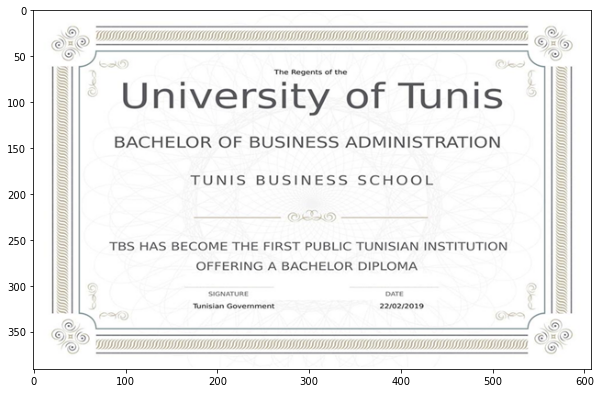

In [12]:
# Let's start with a simple image
img = cv2.imread("../input/tbs-image/TBS_image.png") # image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = [10,10])
height,width,channel = img.shape
plt.imshow(img)
print(type(img))
print(height,width,channel)

In [13]:
# as the image is simple enough, image_to_string method reads all characters almost perfectly!
text = pytesseract.image_to_string(img)
print(text)

10)

5)

CA &

  

€

©
:
Sy
:
:
5
:
Ss
:
s
Ss
S$
Sy
:
s
S$
5
:

‘The Regents of the

: ‘University of Tunis

BACHELOR OF BUSINESS ADMINISTRATION

TUNIS BUSINESS SCHOOL

TBS HAS BECOME THE FIRST PUBLIC TUNISIAN INSTITUTION
OFFERING A BACHELOR DIPLOMA

“unision Goveenment 22027019

ooo @

 

 

—=_£iiiiiittiiiiii iii iiiiiiiiiiiii © 5°



In [14]:
# the output of OCR can be saved in a file in necessary
file = open('output.txt','a') # file opened in append mode
file.write(text)
file.close()

3rd method : 


In [15]:
!pip install https://github.com/myhub/tr/archive/1.5.1.zip

     \ 177.5 MB 9.3 MB/s
  Created wheel for tr: filename=tr-1.5.0-py3-none-any.whl size=162900360 sha256=3249bfc56f0b3d37802a0f0feb8f1dbe0c58fcd67799a1f1e8a79f497cee78f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-pg2o16in/wheels/e8/24/f6/fa325b41760077cc82fdb1745a4cb3ef7f6ac8fd8c5f37e6f2
Successfully built tr


In [16]:
from tr import *
from PIL import Image, ImageDraw, ImageFont

In [17]:
img_pil = Image.open("../input/ocr-working-in-progress/7.jpg")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)
# img_pil

197 255


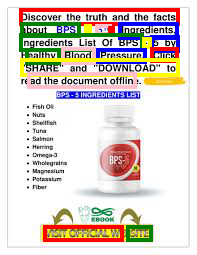

In [18]:
gray_pil = img_pil.convert("L")

rect_arr = detect(img_pil, FLAG_RECT)

img_draw = ImageDraw.Draw(img_pil)
colors = ['red', 'green', 'blue', "yellow", "pink"]

for i, rect in enumerate(rect_arr):
    x, y, w, h = rect
    img_draw.rectangle(
        (x, y, x + w, y + h),
        outline=colors[i % len(colors)],
        width=4)

img_pil

# OPEN CV 

In [19]:
# read image with openCv
img = cv2.imread("../input/tbs-image/TBS_image.png")
# Convert to GrayScale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply dilation and erosion to remove some noise
kernel = np.ones((1,1), np.uint8)
img = cv2.dilate(img, kernel,  iterations=1)
img = cv2.erode(img, kernel, iterations=1)

cv2.imwrite(src_path + "removed_noise.png", img)

#Apply threshold to get image with only black and white
img = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite(src_path + "thres.png",img)

#Recognize text with tesseract for python
result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))


print("---------Start Recognize text from image---------")
print (get_string(src_path+img_path))
print("--------Done-----------")
 

NameError: name 'src_path' is not defined

Credits to : 
[https://www.kaggle.com/ggck43/ocr-using-pytesseract-bengali-english 
](http://)
